The objective of this notebook is to show how to read and plot data from a mooring (time series).

In [1]:
%matplotlib inline
import netCDF4
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from mpl_toolkits.basemap import Basemap

# Data reading

The data file is located in the *datafiles* directory.

In [2]:
datadir = './datafiles/'
datafile = 'NO_TS_MO_HoekVanHollandTG.nc'

As the platform is fixed, we will work on time series.<br/>
We will read the time and the sea water temperature variables, as well as their respective units.

In [3]:
with netCDF4.Dataset(datadir + datafile) as nc:
    time0 = nc.variables['TIME'][:]
    time0_units = nc.variables['TIME'].units
    sealevel = nc.variables['SLEV'][:]
    sealevel_units = nc.variables['SLEV'].units

## Variable units and dimension

In [4]:
print('Sea level units = %s' %sealevel_units)

Sea level units = m


Let's have a look at the dimension of the array

In [5]:
print(sealevel.shape)

(30520, 1)


The first number corresponds to the time and the second to the depth.

# Basic plot

For a time series, we simply use the [plot function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) of matplotlib.<br>
The 1st line change the font size to 16 (see [matplotlib.RcParams](http://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.RcParams)).

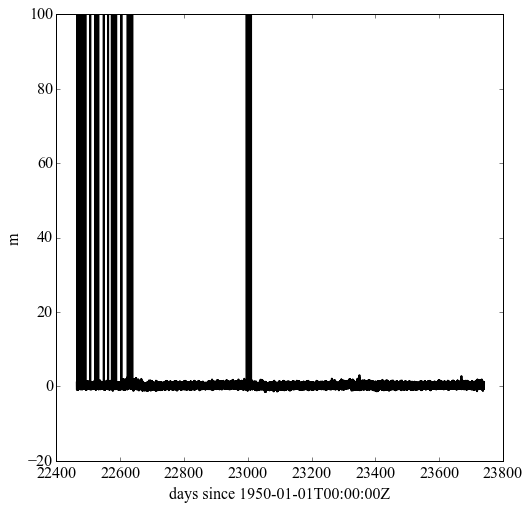

In [6]:
rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(time0, sealevel, 'k-')
plt.xlabel(time0_units)
plt.ylabel(sealevel_units)
plt.show()

As we plotted all the values, regardless of the quality flags, the result is not meaningful.

# Select data according to Quality Flag

We have to load the corresponding variables:

In [7]:
with netCDF4.Dataset(datadir + datafile) as nc:
    sealevel_QC = nc.variables['SLEV_QC'][:]

and we keep only the sea level values with a flag equal to 1.<br>
To do so, we use the [masked arrays](http://docs.scipy.org/doc/numpy-1.10.1/reference/maskedarray.generic.html) module.

In [8]:
sealevel = np.ma.masked_where(sealevel_QC!=1, sealevel)

Let's check the plot again:

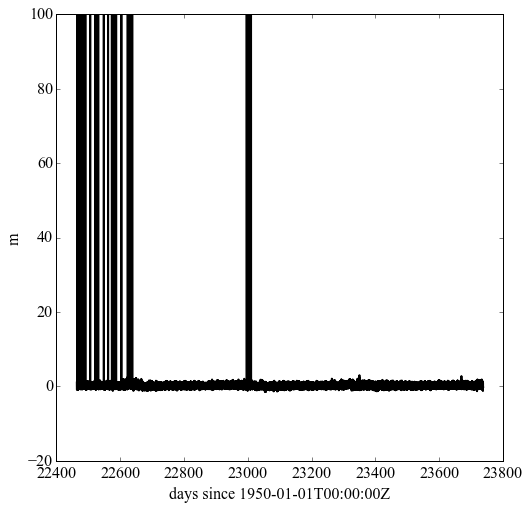

In [9]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(time0, sealevel, 'k-')
plt.xlabel(time0_units)
plt.ylabel(sealevel_units)
plt.show()

Still bad. It seems the QF don't allow us to filter out the data.<br>
Let's have a closer look at it:

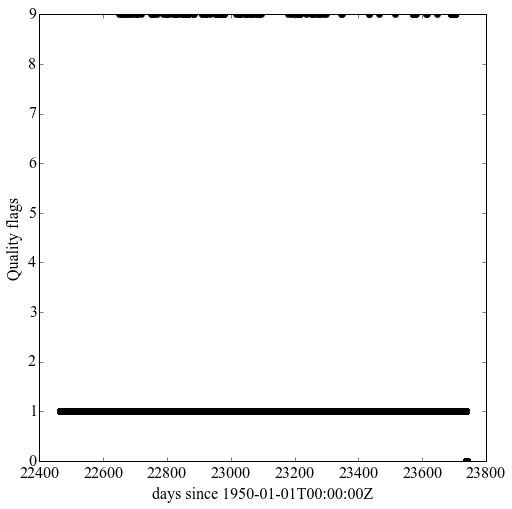

In [10]:
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.plot(time0, sealevel_QC, 'ko')
plt.xlabel(time0_units)
plt.ylabel('Quality flags')
plt.show()

The values are either 1 (good data) or 9 (missing values), never a value indicating suspect or bad data.

A possible solution is to keep only sea level measurements lower than, let's say, 3 meters.

In [11]:
sealevel = np.ma.masked_outside(sealevel, -3., 3.)

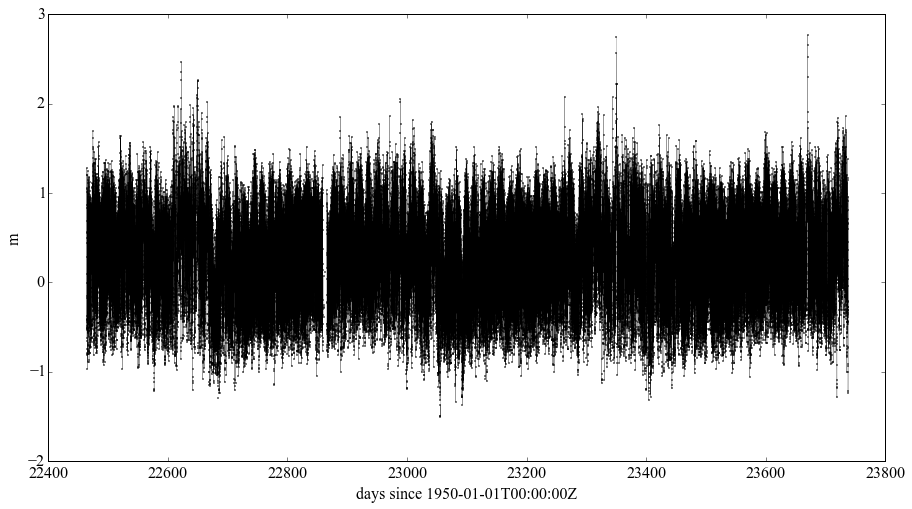

In [12]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
plt.plot(time0, sealevel, 'ko-', lw=0.2, ms=1)
plt.xlabel(time0_units)
plt.ylabel(sealevel_units)
plt.show()

The units set for the time is maybe not the easiest to read.<br/>
However the netCDF4 module offers easy solutions to properly convert the time.

# Converting time units

NetCDF4 provides the function *num2date* to convert the *time* vector into *dates*.<br/>
http://unidata.github.io/netcdf4-python/#section7

In [13]:
from netCDF4 import num2date
dates = num2date(time0, units=time0_units)
print dates[:5]

[datetime.datetime(2011, 7, 4, 1, 0) datetime.datetime(2011, 7, 4, 2, 0)
 datetime.datetime(2011, 7, 4, 3, 0) datetime.datetime(2011, 7, 4, 4, 0)
 datetime.datetime(2011, 7, 4, 5, 0)]


Finally, to avoid to have the overlap of the date ticklabels, we use the [autofmt_xdate](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.autofmt_xdate) function.<br/> 
Everything is in place to create the improved plot.

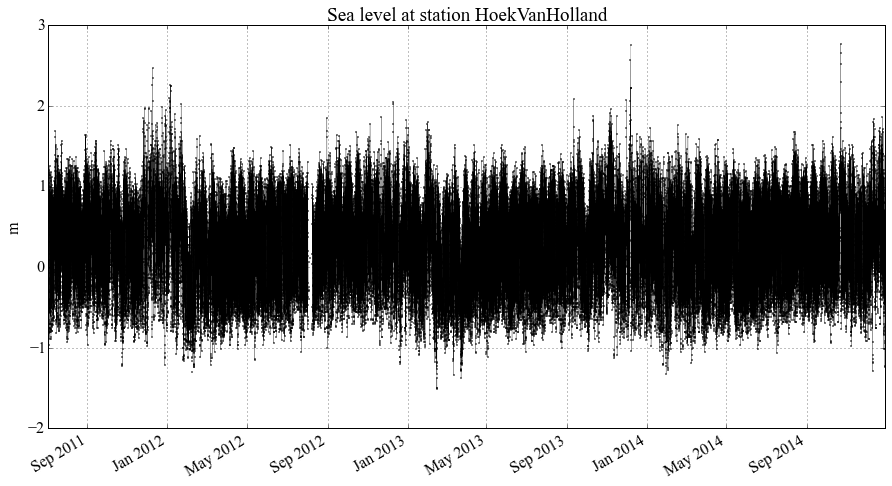

In [15]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
plt.plot(dates, sealevel, 'ko-', lw=0.2, ms=1)
plt.ylabel(sealevel_units)
plt.title('Sea level at station HoekVanHolland')
fig.autofmt_xdate()
plt.grid()
plt.savefig('NO_TS_MO_HoekVanHollandTG.png', dpi=300)
plt.show()